# 📘 PHẦN 1: GIỚI THIỆU CƠ SỞ DỮ LIỆU

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder

%matplotlib inline
sns.set(style="whitegrid")

df = pd.read_csv("Student_Performance_Data_Set.csv")
df.head()


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


## 1.2. Giới thiệu từng thuộc tính

In [2]:

df.info()
df.describe()
df.isnull().sum()
for col in df.columns:
    print(f"{col}: Unique={df[col].nunique()}, Null={df[col].isnull().sum()}, Type={df[col].dtype}")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    object
 20  higher    

### 📋 Bảng tổng hợp thông tin các thuộc tính

In [3]:

df.nunique().to_frame("Số giá trị duy nhất").join(df.dtypes.to_frame("Kiểu dữ liệu"))


,Số giá trị duy nhất,Kiểu dữ liệu
school,2,object
sex,2,object
age,8,int64
address,2,object
famsize,2,object
Pstatus,2,object
Medu,5,int64
Fedu,5,int64
Mjob,5,object
Fjob,5,object


## 1.3. Tiền xử lý dữ liệu

In [13]:

df.ffill(inplace=True)
# Gộp nhãn điểm G3
def grade_category(score):
    if score < 10:
        return 'Low'
    elif score < 15:
        return 'Medium'
    else:
        return 'High'

df['G3_cat'] = df['G3'].apply(grade_category)
le = LabelEncoder()
df['G3_cat_encoded'] = le.fit_transform(df['G3_cat'])


# 📊 PHẦN 2: PHÂN TÍCH DỮ LIỆU & TRỰC QUAN HÓA

## 2.1.1. Trực quan hóa các thuộc tính số

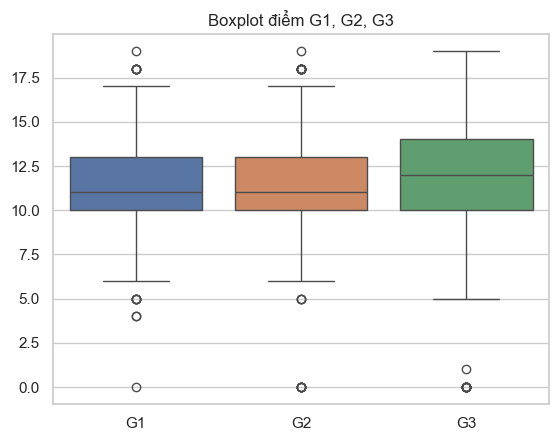

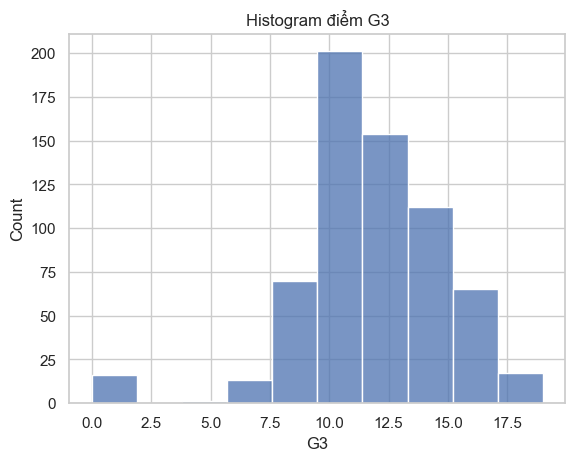

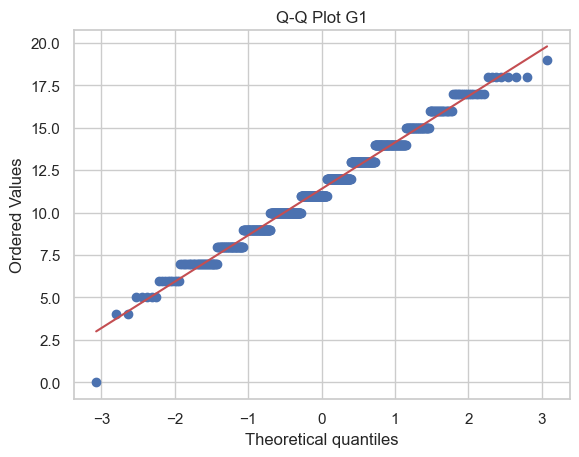

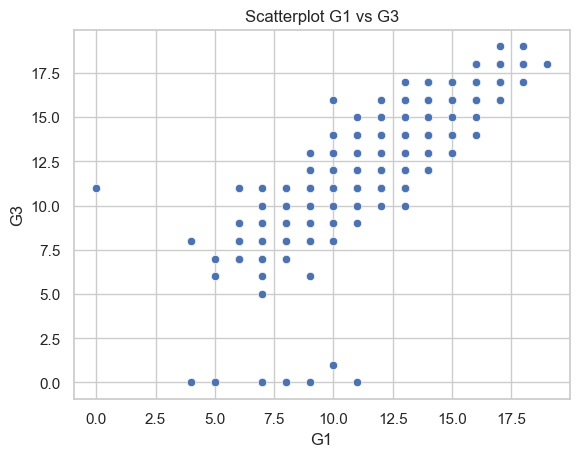

In [5]:

sns.boxplot(data=df[['G1', 'G2', 'G3']])
plt.title("Boxplot điểm G1, G2, G3")
plt.show()

sns.histplot(df['G3'], bins=10)
plt.title("Histogram điểm G3")
plt.show()

stats.probplot(df['G1'], dist="norm", plot=plt)
plt.title("Q-Q Plot G1")
plt.show()

sns.scatterplot(x='G1', y='G3', data=df)
plt.title("Scatterplot G1 vs G3")
plt.show()


## 2.1.2. Trực quan hóa theo nhóm danh nghĩa

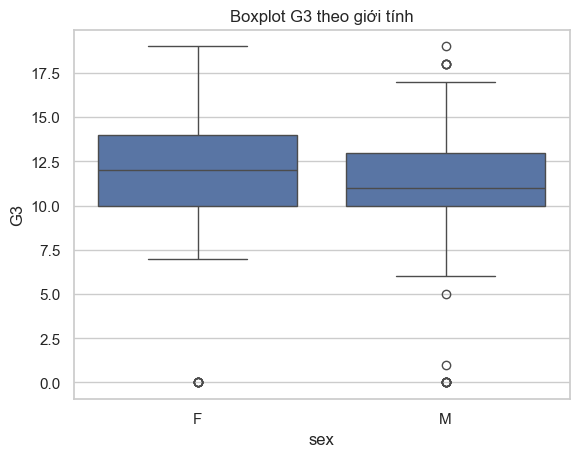

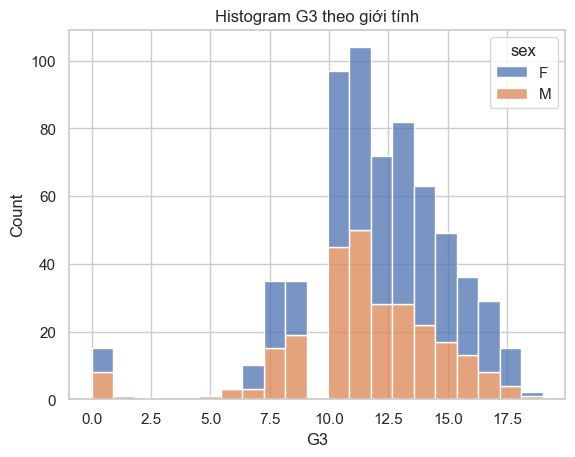

In [6]:

sns.boxplot(x='sex', y='G3', data=df)
plt.title("Boxplot G3 theo giới tính")
plt.show()

sns.histplot(data=df, x='G3', hue='sex', multiple='stack')
plt.title("Histogram G3 theo giới tính")
plt.show()


## 2.1.3. Đo lường tương đồng và khác biệt

/var/folders/r3/8pdlj8l94ds3x1q25cvsmhhm0000gn/T/ipykernel_44103/1067620471.py:27: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) Arial.
  plt.tight_layout()
/Users/baolamabcd/Workspace/project/jupyter/CT/venv/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


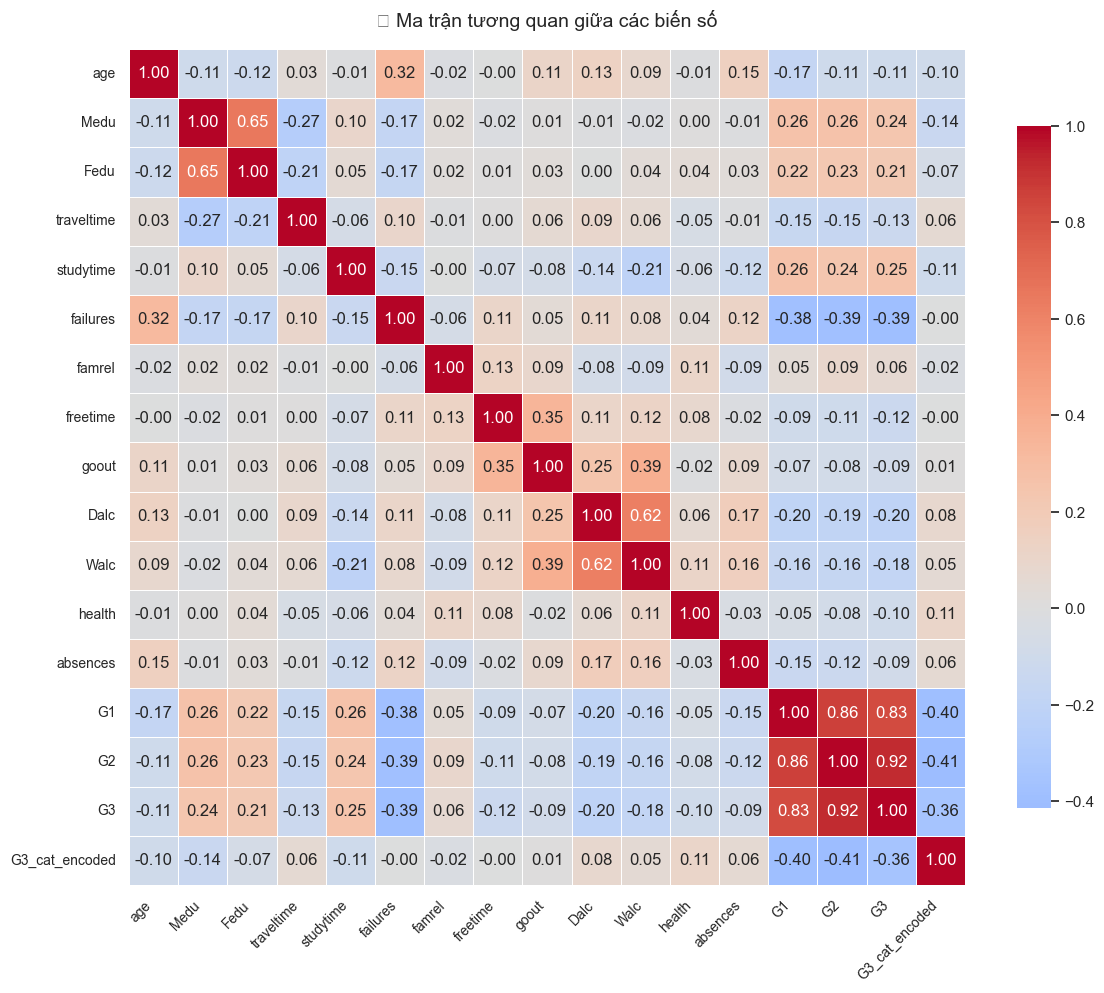

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Tính toán ma trận tương quan
corr_matrix = numeric_cols.corr()

# Thiết lập kích thước và style
plt.figure(figsize=(12, 10))
sns.set(font_scale=1.0)

# Vẽ heatmap
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    center=0,
    linewidths=0.5,
    cbar_kws={"shrink": 0.8},
    square=True
)

# Tối ưu hiển thị
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(rotation=0, fontsize=10)
plt.title("🔍 Ma trận tương quan giữa các biến số", fontsize=14, pad=16)
plt.tight_layout()
plt.show()

## 2.2. Tiền xử lý bằng mã Python (đã thực hiện ở trên)

## 2.3. Tổng hợp dữ liệu theo nhóm `sex`

In [8]:

df.groupby("sex")['G3'].mean()


sex
F    12.253264
M    11.406015
Name: G3, dtype: float64

## 2.4. Trực quan hóa dữ liệu

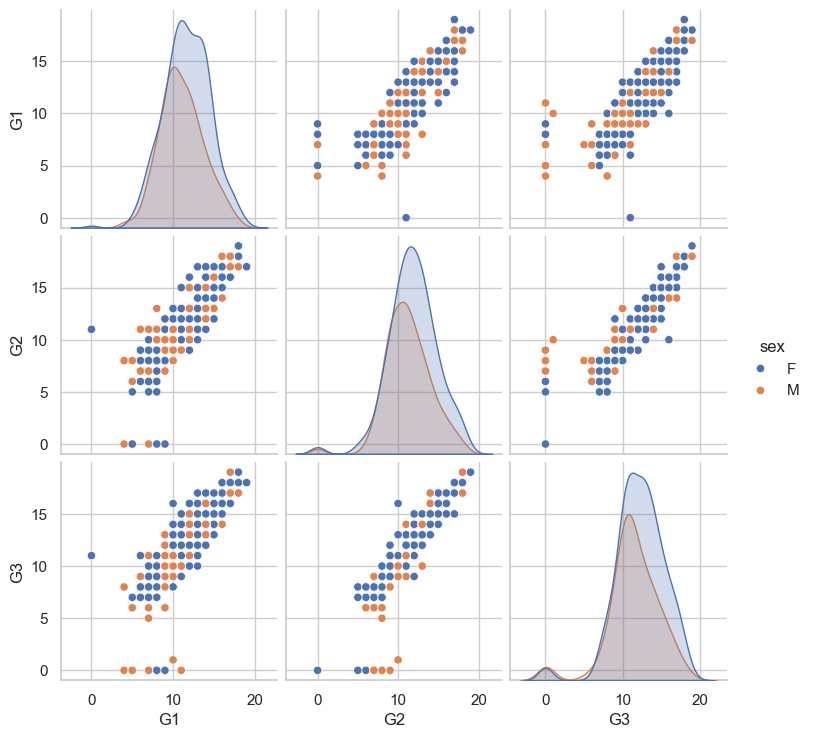

In [9]:

sns.pairplot(df, vars=['G1', 'G2', 'G3'], hue='sex')
plt.show()


# 🧠 PHẦN 2.5: KHAI PHÁ DỮ LIỆU

## 2.5.1. Phương pháp 1 – Khai phá luật kết hợp (Apriori)

In [10]:

cols = ['sex', 'school', 'address', 'internet', 'Mjob']
records = df[cols].astype(str).values.tolist()
te = TransactionEncoder()
te_ary = te.fit(records).transform(records)
df_tf = pd.DataFrame(te_ary, columns=te.columns_)
frequent_itemsets = apriori(df_tf, min_support=0.1, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].sort_values(by='lift', ascending=False).head()


,antecedents,consequents,support,confidence,lift
57,"(F, R)",(MS),0.121726,0.658333,1.890524
60,(MS),"(F, R)",0.121726,0.349558,1.890524
56,"(F, MS)",(R),0.121726,0.541096,1.782595
61,(R),"(F, MS)",0.121726,0.401015,1.782595
124,"(MS, yes)",(R),0.115562,0.528169,1.740009


## 🔍 Phân lớp: Random Forest + ROC

              precision    recall  f1-score   support

        High       0.96      1.00      0.98        44
         Low       0.79      0.58      0.67        26
      Medium       0.92      0.95      0.93       125

    accuracy                           0.91       195
   macro avg       0.89      0.84      0.86       195
weighted avg       0.91      0.91      0.91       195



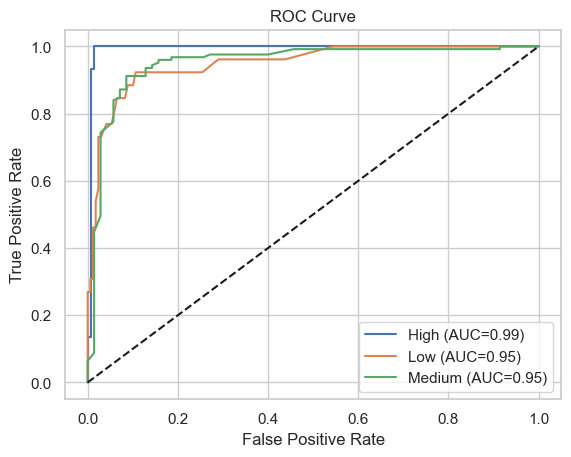

In [11]:

X = pd.get_dummies(df.drop(columns=['G3', 'G3_cat', 'G3_cat_encoded'], errors='ignore'))
y = df['G3_cat_encoded']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model_rf = RandomForestClassifier(random_state=42)
model_rf.fit(X_train_scaled, y_train)
y_pred = model_rf.predict(X_test_scaled)

print(classification_report(y_test, y_pred, target_names=le.classes_))

# ROC curve
from sklearn.preprocessing import label_binarize
y_test_bin = label_binarize(y_test, classes=[0,1,2])
y_score = model_rf.predict_proba(X_test_scaled)
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
plt.figure()
for i, label in enumerate(le.classes_):
    plt.plot(fpr[i], tpr[i], label=f"{label} (AUC={roc_auc[i]:.2f})")
plt.plot([0,1],[0,1],'k--')
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(True)
plt.show()


## 🔍 Phân cụm: KMeans + PCA

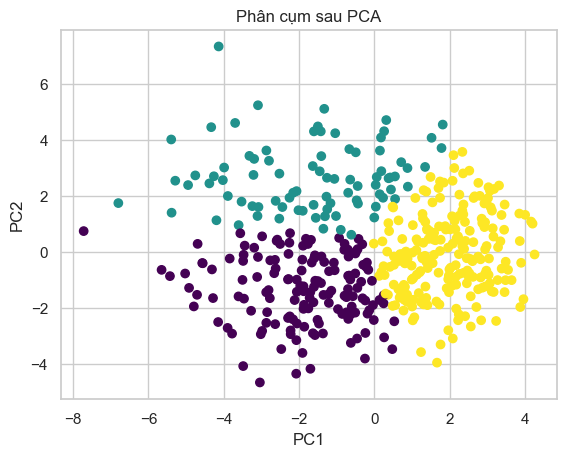

In [12]:

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train_scaled)
kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(X_pca)
plt.scatter(X_pca[:,0], X_pca[:,1], c=labels, cmap='viridis')
plt.title("Phân cụm sau PCA")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid(True)
plt.show()


# ✅ PHẦN 3: KẾT LUẬN & ĐỀ XUẤT


### 📌 Kết luận:
- Dữ liệu đã được xử lý và khai thác hiệu quả với các kỹ thuật thống kê, phân lớp và phân cụm.
- Việc gộp nhãn điểm G3 giúp mô hình dễ học hơn và đánh giá tốt hơn.
- Random Forest và KMeans đều minh họa rõ đặc trưng nhóm dữ liệu.

